# Computer Vision
## Exercise Sheet 3: Image Center, Edges, Keypoints
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. 
2. 
3. 
4. 
5. 


In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 87 (delta 35), reused 62 (delta 18), pack-reused 0
Unpacking objects: 100% (87/87), 1.26 MiB | 7.15 MiB/s, done.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation

%matplotlib inline

## Exercise 3.1
### Finding the Image Center
Camera calibration refers to the process of computing the intrinsic and extrinsic parameters of the camera. It is a necessary step in many computer vision applications such as 3D scene reconstruction and recognition. One important intrinsic parameter is the image center. Print out the images `ueb311.jpg` and `ueb312.jpg` and estimate the image centers by using a ruler.

**Hint**: Make small printouts of the images to have enough space around them.

In [3]:
def load_image_gray(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [4]:
def load_image_gray_normalized(image_path):
    return load_image_gray(image_path).astype('float32')/255.

In [5]:
def gradient(image):
    v = .5
    k_y = np.zeros((3, 3))
    k_y[0, 1] = -v
    k_y[2, 1] = +v

    k_x = np.zeros((3, 3))
    k_x[1, 0] = -v
    k_x[1, 2] = +v

    image = np.copy(image).astype('float32')

    gradient_x = cv2.filter2D(image, -1, k_x)
    gradient_y = cv2.filter2D(image, -1, k_y)

    return gradient_x, gradient_y


## Exercise 3.2.1
### Edge Detection
Open the image `ueb32.jpg` in Python and show the image gradients $d_x$ and $d_y$. Compute the magnitude of gradients image and apply a threshold to retain only the edges of the object. For those edges, compute and show the gradient angle image (`np.arctan2`). How can you tell the angle of the gradient from looking only at the gradients?

In [13]:
def display_with_hist(image):

  plt.figure(figsize=(12,6))
  plt.subplot(2,1,1)
  plt.imshow(image,cmap='gray')
  plt.subplot(2,1,2)
  plt.hist(image.flatten(), 256)
  plt.show()

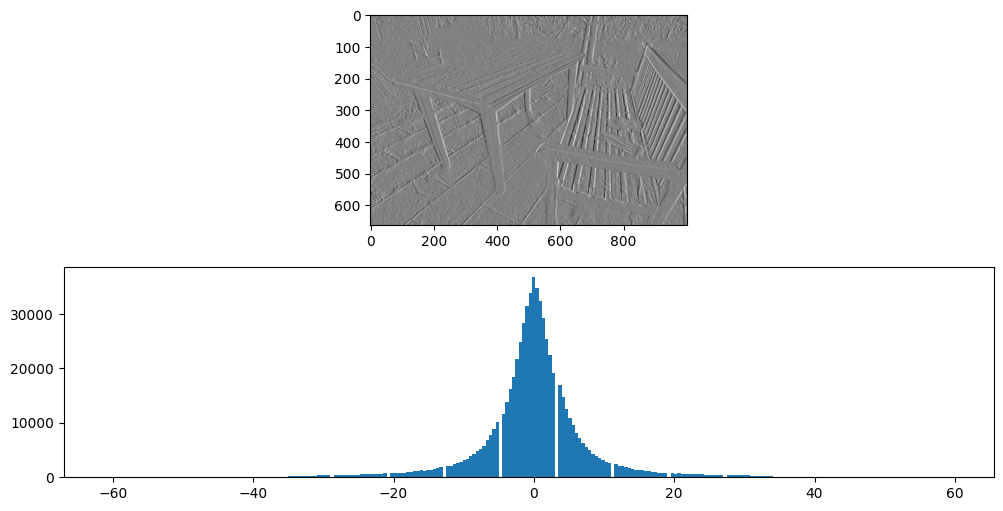

In [14]:
# load image
img = load_image_gray('./data/exercise_3/ueb311.jpg')

# smooth image
smooth_img = cv2.GaussianBlur(img, (5, 5), 0)

# compute and show gradient images 
# make images comparable
gradient_x, gradient_y = gradient(smooth_img)
#fig, axs = plt.subplots(1,2)
#axs[0].imshow(gradient_x, cmap='gray')
#axs[1].imshow(gradient_y, cmap='gray')
display_with_hist(gradient_x)

# compute gradient magnitude

# compute an angle image that should be in range [-180,+180]

# show angles only for real edges


## Exercise 3.2.2
### Canny Edge Detector
Open the image `ueb32.jpg` in Python and use the OpenCV Canny algorithm to find the edges in the image.
Compare the result with the magnitude of gradient image. Display both results side by side using `plt.subplots`.
Comment on how the two results differ and why.**Furthermore, comment how the angle image and the magnitude image are used in the Canny algorithm.**

In [ ]:
# load image
# compute magnitude of gradient image
# apply canny
# compare results

## Exercise 3.3
### Key Point Detection
Implement the following key-point detectors:
* local maxima of $K$
* local maxima of $K$ − $\alpha$ $H^2$, with $\alpha$ as weighting parameter

The function is supposed to return images of the same size as the input, where the pixels contain $K$ or $K$ − $\alpha$ $H^2$.

$K$ and $H$ should be the invariants of the structure tensor $J$ (see script).
Evaluate the detectors above on two kinds of test images: (i) the synthetic image `ueb331.npy`, (ii) the
picture `ueb332.jpg`.

Comment your results with a focus on
1. the localization of the key points
2. the influence of the $H$ term as controlled via the parameter $\alpha$.

**Question**: Why do you filter the image with a Gaussian kernel a second time? It is **not** about noise removal!

**Hint**: Use the provided functions `find_local_max` and `plot_marks`.

In [ ]:
def find_local_max(keypoints, thres=1e-6, k=3):
    kernel = np.ones((k, k))
    kernel[k//2, k//2] = 0
    local_max = keypoints > thres + dilation(keypoints, kernel)

    return local_max

In [ ]:
def plot_marks(map, ax=None):
    if ax is None:
        _, ax = plt.subplots(1)
    col, row = np.nonzero(map)

    ax.plot(row, col, 'r.')

In [ ]:
def key_points_structure(image, alpha, sigma=.1):
    pass
    # image parameters

    # 0. filter with Gaussian kernel with sigma

    # 1. partial derivatives

    # 2. product images

    # 3. filter with gaussian kernel with sigma = 1

    # 4. compute invarians for J

    # return K, K_minus_H
    

In [ ]:
# define alpha, sigma, and k

# load images

# extract keypoints

# show found keypoints (K, K_minus_H) for both images
# example
"""
_, ax = plt.subplots(2, 2, figsize=(15, 15))
local_max = find_local_max(keypoints_K)
ax[0][0].imshow(image)
plot_marks(local_max, ax[0][0])

local_max = find_local_max(keypoints_K_minus_H)
ax[0][1].imshow(image)
plot_marks(local_max, ax[0][1])
"""